Import Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

PreProcessing Data

In [3]:
# Label Encoding
label_encoders = {}
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = {'le': le, 'classes_': le.classes_}

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


Define Feature and Target Variable

In [4]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

Split Dataset into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Selection and Training

In [7]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred)
    }
    print(f'{name} Accuracy: {accuracy}')
    
# Find the best model based on accuracy
best_model_name = max(model_results, key=lambda name: model_results[name]['accuracy'])
best_accuracy = model_results[best_model_name]['accuracy']
print(f'Best Algorithm: {best_model_name} with Accuracy: {best_accuracy}')

Random Forest Accuracy: 0.9479905437352246
Decision Tree Accuracy: 0.9408983451536643
Support Vector Machine Accuracy: 0.8888888888888888
Best Algorithm: Random Forest with Accuracy: 0.9479905437352246


Confusion Matrix

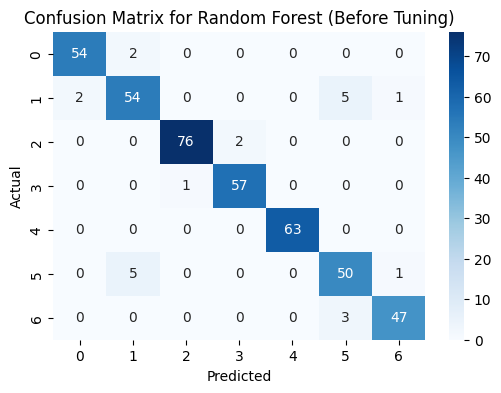

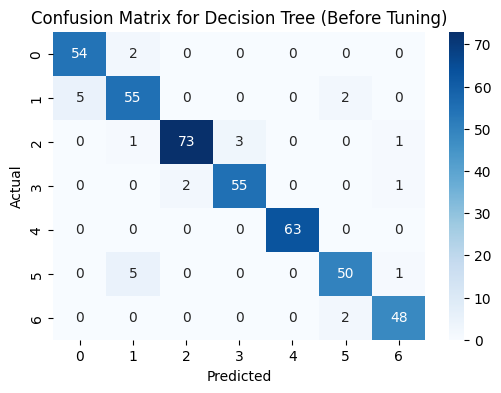

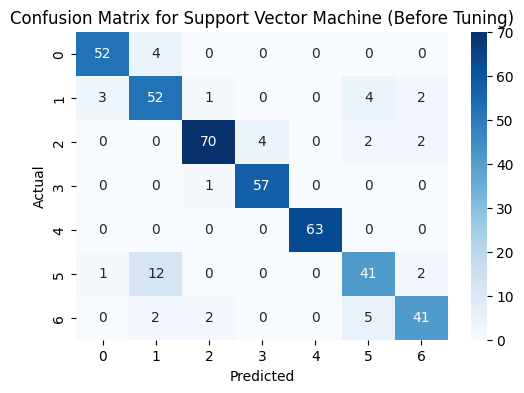

In [17]:
def plot_confusion_matrix(y_true, y_pred, model_name, stage='Before Tuning'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name} ({stage})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrix sebelum tuning
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name, stage='Before Tuning')

Hyperparameter Tuning

Random Forest

In [8]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = RandomForestClassifier(**best_params_rf)
best_model_rf.fit(X_train_scaled, y_train)

y_pred_rf = best_model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy with Best Parameters (after tuning): {accuracy_rf}')
print('Classification Report for Random Forest (after tuning):')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy with Best Parameters (after tuning): 0.9479905437352246
Classification Report for Random Forest (after tuning):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.92      0.90        62
           2       0.97      0.95      0.96        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.89      0.89        56
           6       0.94      0.94      0.94        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



Decision Tree

In [9]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

best_params_dt = grid_search_dt.best_params_
best_model_dt = DecisionTreeClassifier(**best_params_dt)
best_model_dt.fit(X_train_scaled, y_train)

y_pred_dt = best_model_dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy with Best Parameters (after tuning): {accuracy_dt}')
print('Classification Report for Decision Tree (after tuning):')
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy with Best Parameters (after tuning): 0.9385342789598109
Classification Report for Decision Tree (after tuning):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.88      0.90      0.89        62
           2       0.96      0.94      0.95        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.89      0.89      0.89        56
           6       0.94      0.92      0.93        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



Support Vector Machine

In [10]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=3, n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

best_params_svm = grid_search_svm.best_params_
best_model_svm = SVC(**best_params_svm)
best_model_svm.fit(X_train_scaled, y_train)

y_pred_svm = best_model_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy with Best Parameters (after tuning): {accuracy_svm}')
print('Classification Report for SVM (after tuning):')
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Accuracy with Best Parameters (after tuning): 0.983451536643026
Classification Report for SVM (after tuning):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.97      0.98        62
           2       0.99      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.98      0.96      0.97        56
           6       0.96      0.96      0.96        50

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



Confusion Matrix

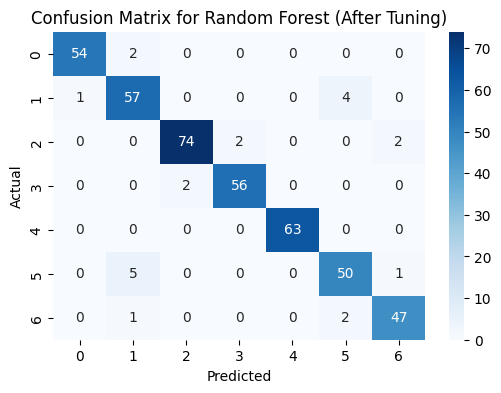

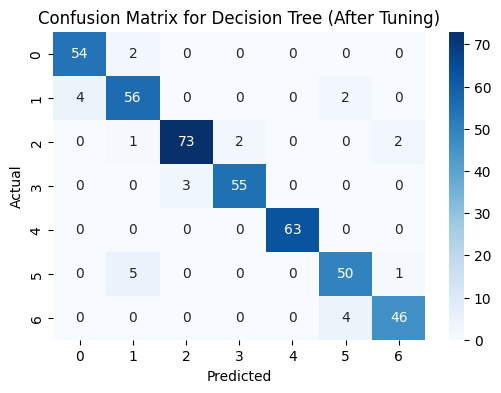

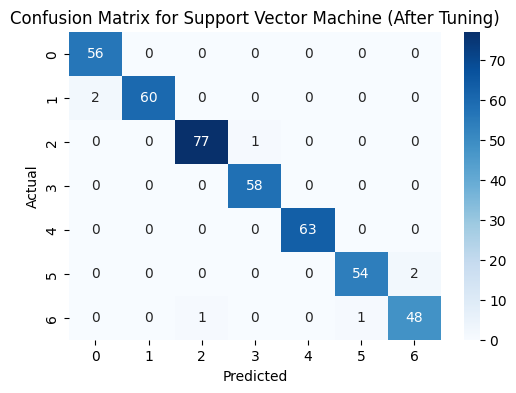

In [18]:
# Confusion matrix sesudah tuning
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest', stage='After Tuning')
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree', stage='After Tuning')
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine', stage='After Tuning')

Feature Importance

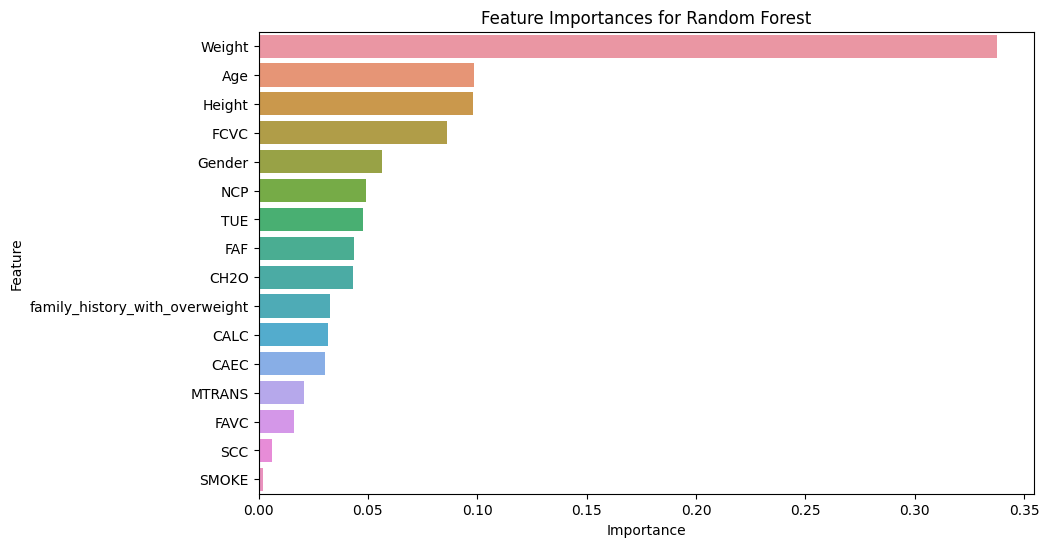

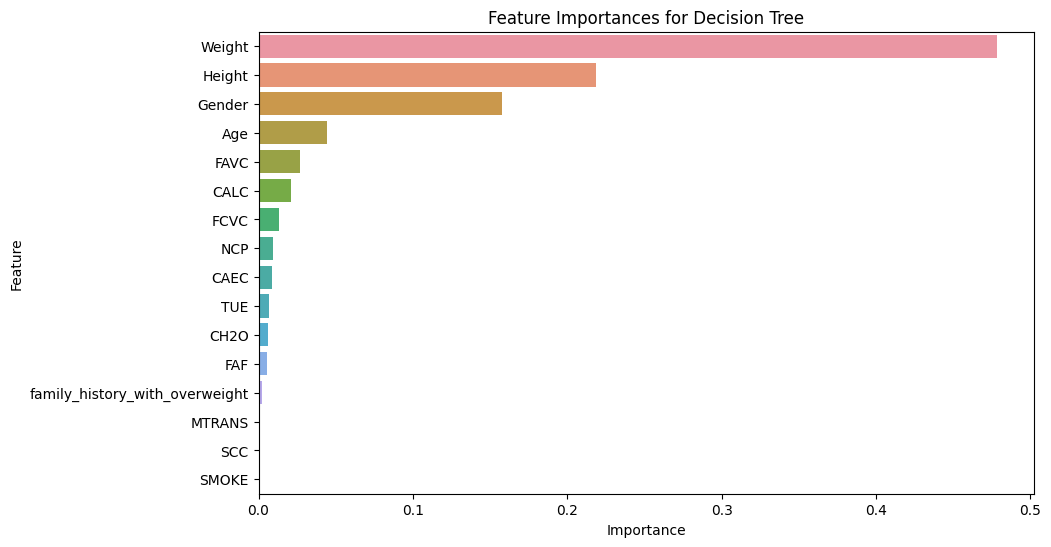

In [19]:
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,6))
        sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Model {model_name} tidak memiliki atribut feature_importances_.")

feature_names = X.columns

plot_feature_importance(best_model_rf, 'Random Forest', feature_names)
plot_feature_importance(best_model_dt, 'Decision Tree', feature_names)


Predict on New Data

In [11]:
# Load the new data
new_data = pd.read_csv("ObesityDataSet - Copy.csv")

In [12]:
# Preprocess the new data
# Use the label encoders saved during training
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for column in categorical_columns:
    le = label_encoders[column]['le']
    new_data[column] = le.transform(new_data[column])
    
# Feature scaling for the new data
X_new_scaled = scaler.transform(new_data)

In [13]:
# Use the best model for prediction
# Check which model is currently the best (Random Forest, Decision Tree, or SVM)
if best_model_name == 'Random Forest':
    model_to_use = best_model_rf
elif best_model_name == 'Decision Tree':
    model_to_use = best_model_dt
elif best_model_name == 'Support Vector Machine':
    model_to_use = best_model_svm
    
print(best_model_name)


Random Forest


In [14]:
# Predict with the best model
y_pred_new = model_to_use.predict(X_new_scaled)

# Map the encoded predictions back to their original labels
inv_label_mapping = {i: label for i, label in enumerate(label_encoders['NObeyesdad']['classes_'])}
y_pred_labels = [inv_label_mapping[pred] for pred in y_pred_new]

# Add the predictions to the new_data DataFrame
new_data['Predicted_NObeyesdad'] = y_pred_labels

# Define a function to inverse transform using label encoder
def inverse_transform_labels(encoded_labels, le):
    return le.inverse_transform(encoded_labels)

# Inverse transform for categorical columns to restore original values
for column in categorical_columns:
    if column in new_data.columns:
        le = label_encoders[column]['le']
        new_data[f'Original_{column}'] = inverse_transform_labels(new_data[column], le)

# Select columns to display: original categorical columns and predicted labels
cols_to_display = ['Original_Gender', 'Original_family_history_with_overweight', 'Original_FAVC',
                   'Original_CAEC', 'Original_SMOKE', 'Original_SCC', 'Original_CALC', 'Original_MTRANS', 'Predicted_NObeyesdad']

print(new_data[cols_to_display].head())  # Display the first few rows of the processed data

  Original_Gender Original_family_history_with_overweight Original_FAVC  \
0          Female                                     yes            no   
1          Female                                     yes            no   
2            Male                                     yes            no   

  Original_CAEC Original_SMOKE Original_SCC Original_CALC  \
0     Sometimes             no           no            no   
1     Sometimes            yes          yes     Sometimes   
2     Sometimes             no           no    Frequently   

         Original_MTRANS Predicted_NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
